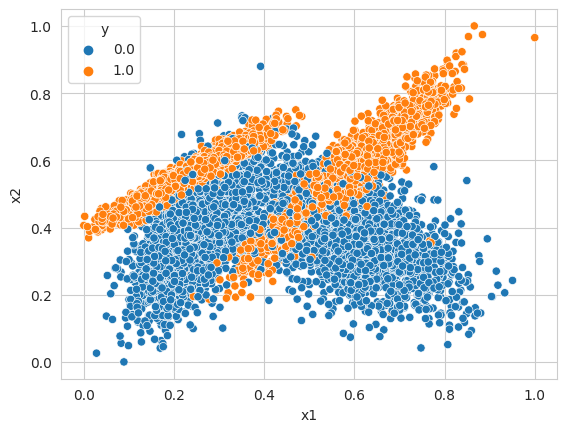

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from snsynth.gsd import GSDSynthesizer
from snsynth.aim import AIMSynthesizer
from sklearn.datasets import make_classification
import time
from snsynth import Synthesizer
from snsynth.transform import *
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt

def save_sync_data(df: pd.DataFrame, mech: str, eps: float, seed: int):
    path = f'sync_data/{mech}/{eps:.2f}/{seed}'
    os.makedirs('sync_data', exist_ok=True)
    os.makedirs(f'sync_data/{mech}', exist_ok=True)
    os.makedirs(f'sync_data/{mech}/{eps:.2f}', exist_ok=True)
    os.makedirs(path, exist_ok=True)
    print(f'Saving {path}')
    df.to_csv(path)

# SKlear (Categorical)
def plot_2d(arg_data_df):
    sns.scatterplot(data=arg_data_df, x='x1', y='x2', hue='y')
    # plt.show()

def get_data(dim, seed):
    X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,random_state=0)

    # X_binned = enc.fit_transform(X)
    # print(X_binned.shape)
    data_df = pd.DataFrame(np.column_stack((X, y)), columns=['x1', 'x2', 'y'])
    data_df['x1'] = (data_df['x1'] - data_df['x1'].min()) / (data_df['x1'].max() - data_df['x1'].min())
    data_df['x2'] = (data_df['x2'] - data_df['x2'].min()) / (data_df['x2'].max() - data_df['x2'].min())
    return data_df
# data_df_binned = pd.DataFrame(np.column_stack((X_binned, y)), columns=['x1', 'x2', 'y'])


def bin_data(arg_df, bins):
    # enc = KBinsDiscretizer(n_bins=bins, encode='ordinal')
    x1 = np.digitize(arg_df['x1'].values, bins=np.linspace(0, 1, bins))
    x2 = np.digitize(arg_df['x2'].values, bins=np.linspace(0, 1, bins))
    data_df_binned = pd.DataFrame(np.column_stack((x1, x2, y)), columns=['x1', 'x2', 'y'])
    return data_df_binned

def inverse_bin_data(arg_binned_df, bins=10):
    arg_binned_df['x1'] = arg_binned_df['x1'] / bins
    arg_binned_df['x2'] = arg_binned_df['x2'] / bins
    # X = arg_enc.inverse_transform(arg_binned_df[['x1', 'x2']])
    # return pd.DataFrame(np.column_stack((X, y)), columns=['x1', 'x2', 'y'])
    return arg_binned_df


cat_tt = TableTransformer([
    ChainTransformer([LabelTransformer(), OneHotEncoder()]), # y
    ChainTransformer([LabelTransformer(), OneHotEncoder()]), # y
    ChainTransformer([LabelTransformer(), OneHotEncoder()]), # y
])

real_valued_tt = TableTransformer([
    ChainTransformer([ClampTransformer(lower=0, upper=1), MinMaxTransformer(lower=0, upper=1) ]),
    ChainTransformer([ClampTransformer(lower=0, upper=1), MinMaxTransformer(lower=0, upper=1) ]),
    ChainTransformer([LabelTransformer(), OneHotEncoder()]), # y
])

plot_2d(data_df)
print()

Cond.Marginal= ['x1', 'x2'] . Sigma=0.0006. Top.Level=7. Max.Size=None
Cond.Marginal= ['x1', 'y'] . Sigma=0.0006. Top.Level=7. Max.Size=None
Cond.Marginal= ['x2', 'y'] . Sigma=0.0006. Top.Level=7. Max.Size=None
	Total size=22860
Statistics size = 22860
Statistics size = 22860
Gen=         0: fitness=0.745791416. fitness change=1.00000000  Strategy weights:  [0.25 0.25 0.25 0.25] time=1.50 (s)
Gen=      2000: fitness=0.106946895. fitness change=1.00000000  Strategy weights:  [0.25 0.25 0.25 0.25] time=4.82 (s)
Gen=      4000: fitness=0.0151667087. fitness change=0.85818468  Strategy weights:  [0.22  0.187 0.237 0.355] time=7.36 (s)
Gen=      6000: fitness=0.00862874408. fitness change=0.43107340  Strategy weights:  [0.191 0.335 0.277 0.197] time=9.99 (s)
Gen=      8000: fitness=0.0082035317. fitness change=0.04927859  Strategy weights:  [0.182 0.501 0.298 0.018] time=12.71(s)
Gen=     10000: fitness=0.00805961915. fitness change=0.01754276  Strategy weights:  [0.232 0.467 0.3   0.   ] t

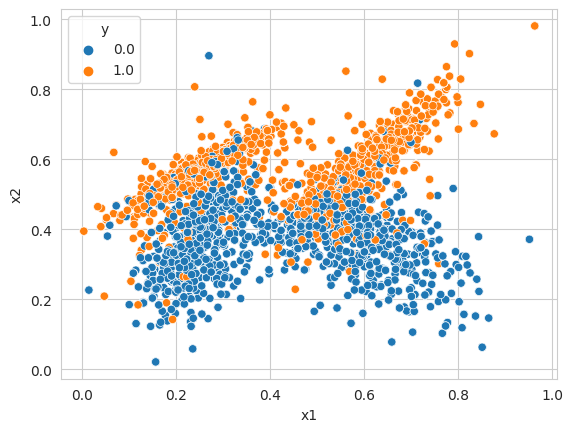

In [9]:
gsd_tt = TableTransformer([
    ChainTransformer([ClampTransformer(lower=0, upper=1), MinMaxTransformer(lower=0, upper=1) ]),
    ChainTransformer([ClampTransformer(lower=0, upper=1), MinMaxTransformer(lower=0, upper=1) ]),
    ChainTransformer([LabelTransformer()]), # y
])

t0 = time.time()
synth = GSDSynthesizer(10.0, 1e-9, verbose=True, tree_height=7)
# Since we are passing the data bounds, we do not need to provide privacy budget for preprocessing.
meta_data = {
    'x1' : {'type': 'float', 'lower': 0, 'upper': 1},
    'x2' : {'type': 'float', 'lower': 0, 'upper': 1},
    'y' : {'type': 'string', 'size': 2},
}
synth.fit(data_df,
          meta_data=meta_data,
          N_prime=2000)
print(f'elapsed time = {time.time() - t0}')
sync_df = synth.sample(10000)
plot_2d(sync_df)


AIM

Fitting with 30000 dimensions
3
Initial Sigma 4.944411949770374
Selected ('col1', 'col2') Size 300 Budget Used 0.07708333333333334
Selected ('col2',) Size 3 Budget Used 0.09791666666666667
(!!!!!!!!!!!!!!!!!!!!!!) Reducing sigma 2.472205974885187
Selected ('col0', 'col2') Size 300 Budget Used 0.18125
Selected ('col1',) Size 100 Budget Used 0.26458333333333334
Selected ('col2',) Size 3 Budget Used 0.34791666666666665
Selected ('col0',) Size 100 Budget Used 0.43124999999999997
(!!!!!!!!!!!!!!!!!!!!!!) Reducing sigma 1.2361029874425935
Selected ('col0', 'col1') Size 10000 Budget Used 1.0
Estimating marginals
elapsed time= 31.377


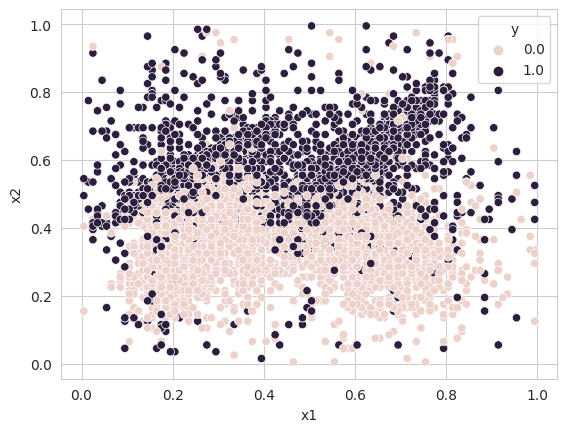

In [16]:
t0 = time.time()
# aim = AIMSynthesizer(epsilon=2.0,  verbose=True)
bin_tt = TableTransformer([
    ChainTransformer([BinTransformer(bins=100, lower=0, upper=1)]), # y
    ChainTransformer([BinTransformer(bins=100, lower=0, upper=1)]), # y
    ChainTransformer([LabelTransformer()]), # y
])
synth = Synthesizer.create('aim', epsilon=10.0, delta=1e-9, verbose=True)
synth.fit(data_df,
          # continuous_columns=['x1', 'x2'],
          # categorical_columns=['y'],
        transformer=bin_tt)
print(f'elapsed time= {time.time() - t0:.3f}')
aim_sync_df = synth.sample(samples=10000)
plot_2d(aim_sync_df)


 GSD

In [33]:
# Run GSD
#
# t0 = time.time()
# gsd = GSDSynthesizer(epsilon=1.0, delta=1e-9, verbose=True)
# gsd.fit(adult_df_train, N_prime=5000, categorical_columns=categorical_columns)
#
# print(f'elapsed time= {time.time() - t0:.3f}')
# gsd_adult_df = gsd.sample()

elapsed time= 503.126


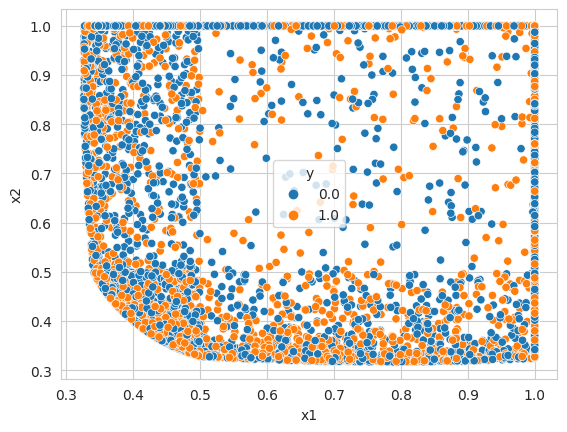

In [24]:
# lass snsynth.pytorch.nn.dpctgan.DPCTGAN(embedding_dim=128, generator_dim=(256, 256), discriminator_dim=(256, 256), generator_lr=0.0002, generator_decay=1e-06, discriminator_lr=0.0002, discriminator_decay=1e-06, batch_size=500, discriminator_steps=1, verbose=True, epochs=300, pac=1, cuda=True, disabled_dp=False, delta=None, sigma=5, max_per_sample_grad_norm=1.0, epsilon=1, loss='cross_entropy')

gens = ['pategan']

for g_name in gens:
    synth = Synthesizer.create(g_name, epsilon=10.0, delta=1e-9,
                               # verbose=True,
                               # epochs=100,
                               # embedding_dim=8,
                               # generator_dim=(16, 16),
                               # discriminator_dim=(16, 16),
                               )
    synth.fit(data_df,
              transformer=real_valued_tt,
              continuous_columns=['x1', 'x2'],
                categorical_columns=['y'])
    # transformer=tt,
    print(f'elapsed time= {time.time() - t0:.3f}')
    aim_sync_df = synth.sample(10000)
    plot_2d(aim_sync_df)


In [109]:

synth = Synthesizer.create('dpgan', epsilon=10.0, delta=1e-9)
synth.fit(data_df,
          transformer=real_valued_tt,
          continuous_columns=['x1', 'x2'],
            categorical_columns=['y'])
# transformer=tt,
print(f'elapsed time= {time.time() - t0:.3f}')
sync_df = synth.sample(10000)
plot_2d(sync_df)

/home/giuseppe/anaconda3/envs/smartnoise-sdk-gsd/lib/python3.10/site-packages/opacus/privacy_engine.py:638: UserWarning: The sample rate will be defined from ``batch_size`` and ``sample_size``.The returned privacy budget will be incorrect.
  warnings.warn(
/home/giuseppe/anaconda3/envs/smartnoise-sdk-gsd/lib/python3.10/site-packages/opacus/privacy_engine.py:229: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_rng`` turned on.
  warnings.warn(
/home/giuseppe/anaconda3/envs/smartnoise-sdk-gsd/lib/python3.10/site-packages/torch/nn/modules/module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.wa

KeyboardInterrupt: 

In [ ]:
# Run this cell to observe slow converge behavior without the cross genetic operator.
# class snsynth.pytorch.nn.PATECTGAN(embedding_dim=128, generator_dim=(256, 256), discriminator_dim=(256, 256), generator_lr=0.0002, generator_decay=1e-06, discriminator_lr=0.0002, discriminator_decay=1e-06, batch_size=500, discriminator_steps=1, verbose=True, epochs=300, pac=1, cuda=True, epsilon=1, binary=False, regularization=None, loss='cross_entropy', teacher_iters=5, student_iters=5, sample_per_teacher=1000, delta=None, noise_multiplier=0.001, moments_order=100)


# ML evaluation



We follow the train on synthetic, test on real approach:

- Given two sets of real data: A train set and ad test set.
- Generate synthetic data using the train set.
- Then we train a ML model using the synthetic data.
- Finally, we validate the model's performance using the holdout real data.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier

import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.metrics import f1_score

categorical_features = categorical_columns.copy()
label = 'earning-class'
categorical_features.remove(label)


categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        # ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", GradientBoostingClassifier())]
)

In [43]:
X_real = adult_df_train[categorical_features]
y_real = adult_df_train[label]


X_test = adult_df_test[categorical_features]
y_test = adult_df_test[label]

clf.fit(X_real, y_real)

print(f'Train on real:')
print(f"Accuracy={clf.score(X_test, y_test):.4f}")
print(f"F1-score = {f1_score(y_test, clf.predict(X_test), average='macro'):.4f}")

Train on real:
Accuracy=0.8349
F1-score = 0.7528


In [42]:
X_aim = aim_adult_df[categorical_features]
y_aim = aim_adult_df[label]

clf.fit(X_aim, y_aim)


print(f'Train on AIM synthetic data:')
print(f"Accuracy = {clf.score(X_test, y_test):.4f}")
print(f"F1-score = {f1_score(y_test, clf.predict(X_test), average='macro'):.4f}")

Train on AIM synthetic data:
Accuracy = 0.8303
F1-score = 0.7461


In [41]:
X_gsd = gsd_adult_df[categorical_features]
y_gsd = gsd_adult_df[label]

clf.fit(X_gsd, y_gsd)

print(f'Train on GSD synthetic data:')
print(f"Accuracy = {clf.score(X_test, y_test):.4f}")
print(f"F1-score = {f1_score(y_test, clf.predict(X_test), average='macro'):.4f}")

Train on GSD synthetic data:
Accuracy = 0.8349
F1-score = 0.7494


In [ ]:
import matplotlib.pyplot as plt
rng = np.random.default_rng(0)

collect = []

mean = [0.5, 0.5]
cov = [[.01, 0.0099], 
       [0.0099, .01]]  # diagonal covariance

N = 200

x, y = np.random.multivariate_normal(mean, cov, N).T
values_cont = np.column_stack((x, y))
values_cont[100:300, 0] = 0.03
values_cont[100:300, 1] = 0.93

cont_cols = ['c1', 'c2']
data_cont_df = pd.DataFrame(values_cont, columns=cont_cols)
meta_data = {'c1': {'type': 'float', 'lower': 0, 'upper': 1}, 'c2': {'type': 'float', 'lower': 0, 'upper': 1}}

plot_data = data_cont_df.copy()
plot_data.loc[:, 'Type'] = 'Original'
collect.append(plot_data)


for epsilon in [1000, 100]:
    print(f'epsilon={epsilon}')
    synth = GSDSynthesizer(float(epsilon), 1e-5, tree_height=12, verbose=True)
    synth.fit(data_cont_df, meta_data=meta_data, 
              genetic_operators=['mutate', 'continuous'])
    error = np.abs(synth.stat_fn(synth.data.to_numpy()) - synth.stat_fn(synth.sync_data.to_numpy()))
    print(f'epsilon={epsilon}', f'Statistical error: max={error.max():.4f}, Avg={error.mean():.4f}')

    sync_df = synth.sample()
    sync_df.loc[:, 'Type'] = f'eps={epsilon}'
    collect.append(sync_df)

    synth = GSDSynthesizer(float(epsilon), 1e-5, tree_height=12, verbose=True)
    # Since we are passing the data bounds, we do not need to provide privacy budget for preprocessing.
    synth.fit(data_cont_df, meta_data=meta_data, 
              genetic_operators=['mutate', 'continuous', 'swap'])
    error = np.abs(synth.stat_fn(synth.data.to_numpy()) - synth.stat_fn(synth.sync_data.to_numpy()))
    print(f'epsilon={epsilon}', f'Statistical error: max={error.max():.4f}, Avg={error.mean():.4f}')
    sync_df = synth.sample()
    sync_df.loc[:, 'Type'] = f'eps={epsilon}/swap'
    collect.append(sync_df)



In [ ]:
all_data = pd.concat(collect)
g= sns.FacetGrid(data=all_data, col='Type', sharey=True,sharex=True)
g.map(sns.scatterplot, "c1", "c2", alpha=0.1)
plt.show()

# End